In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv("students_grades.csv")

In [79]:
print(df.shape)
display(df.head())
display(df.info())

(40, 8)


,Name,Subject,Exam1,Exam2,FinalExam,Gender,StudyHours,Attendance
0,Ali,Kimya,65.0,36,44,Erkek,12.7,63.8
1,Ayşe,Tarih,98.0,94,62,Erkek,2.5,77.3
2,Mehmet,Matematik,45.0,100,89,Erkek,2.8,82.6
3,Elif,Fizik,76.0,80,41,Erkek,14.7,61.9
4,Ahmet,Fizik,66.0,48,50,Kadın,9.4,82.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        40 non-null     object 
 1   Subject     40 non-null     object 
 2   Exam1       39 non-null     float64
 3   Exam2       40 non-null     int64  
 4   FinalExam   40 non-null     int64  
 5   Gender      40 non-null     object 
 6   StudyHours  40 non-null     float64
 7   Attendance  40 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.6+ KB


None

In [81]:
for col in ["Exam1","Exam2","FinalExam","Gender","StudyHours","Attendance"]: # Sayısal sütünları sayıya dönüştürmek.
    df[col]=pd.to_numeric(df[col], errors="coerce")
print("Eksik değer sayıları:\n", df.isna().sum())               # Boş satır değerleri kaldırmak.
bad_att=df[(df["Attendance"]>100) | (df["Attendance"]<0)]              # 0-100 aralığının dışındaki değerleri yakalamak için
display(bad_att)


Eksik değer sayıları:
 Name           0
Subject        0
Exam1          1
Exam2          0
FinalExam      0
Gender        40
StudyHours     0
Attendance     0
dtype: int64


,Name,Subject,Exam1,Exam2,FinalExam,Gender,StudyHours,Attendance
27,Cem,Kimya,84.0,99,38,NaN,11.9,110.0


In [83]:
df.loc[df["Attendance"]>100,"Attendance"]=100 # 100 den fazla değer varsa 100'e eşitlemek.
display(df[df[["Exam1","Exam2","FinalExam"]].isna().any(axis=1)]) # Değeri olmayan stunları bulmak.

,Name,Subject,Exam1,Exam2,FinalExam,Gender,StudyHours,Attendance
5,Zeynep,Fizik,NaN,54,82,NaN,3.3,88.5


In [85]:
df['Exam1'] = df['Exam1'].fillna(df.groupby('Subject')['Exam1'].transform('median')) # Eksik sınav verisinin sılmek

In [87]:
df_clean["Average"]=(0.3*df_clean["Exam1"]+0.3*df_clean["Exam2"]+0.4*df_clean["FinalExam"]) #Orta
display(df_clean[["Name","Subject","Exam1","Exam2","FinalExam","Average"]].head())

,Name,Subject,Exam1,Exam2,FinalExam,Average
0,Ali,Kimya,65.0,36,44,47.9
1,Ayşe,Tarih,98.0,94,62,82.4
2,Mehmet,Matematik,45.0,100,89,79.1
3,Elif,Fizik,76.0,80,41,63.2
4,Ahmet,Fizik,66.0,48,50,54.2


In [89]:
display(df_clean["Average"].describe())  #Genel istatistik.

count    40.000000
mean     67.667500
std      13.247126
min      44.400000
25%      54.275000
50%      67.750000
75%      79.250000
max      88.900000
Name: Average, dtype: float64

In [95]:
subject_mean=df_clean.groupby("Subject")["Average"].mean().sort_values(ascending=False) #Derslere göre ortalama
print("Derse göre ortalama\n",subject_mean)

Derse göre ortalama
 Subject
Matematik     78.800000
Matematik     74.883333
Tarih         69.750000
Kimya         68.180000
Fizik         65.130000
Biyoloji      61.000000
Name: Average, dtype: float64


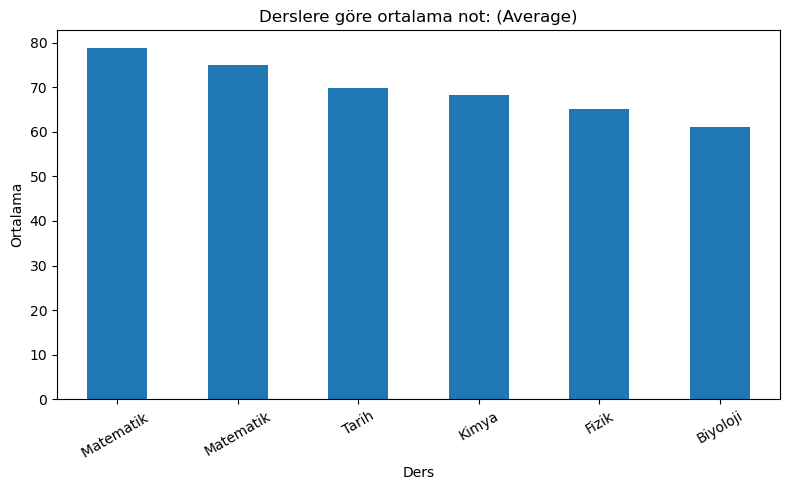

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(8,5))     # bAR ile görselleştirme
subject_mean.plot(kind="bar")
plt.title("Derslere göre ortalama not: (Average)")
plt.ylabel("Ortalama")
plt.xlabel("Ders")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
plt.savefig("Subject_mean_bar.png",dpi=150)

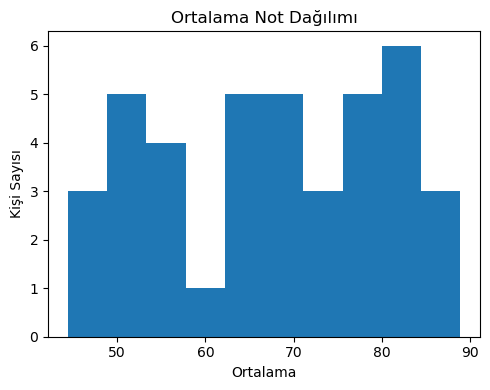

In [125]:
plt.figure(figsize=(5,4))
plt.hist(df_clean["Average"],bins=10)
plt.title("Ortalama Not Dağılımı")
plt.xlabel("Ortalama")
plt.ylabel("Kişi Sayısı")
plt.tight_layout()
plt.show()

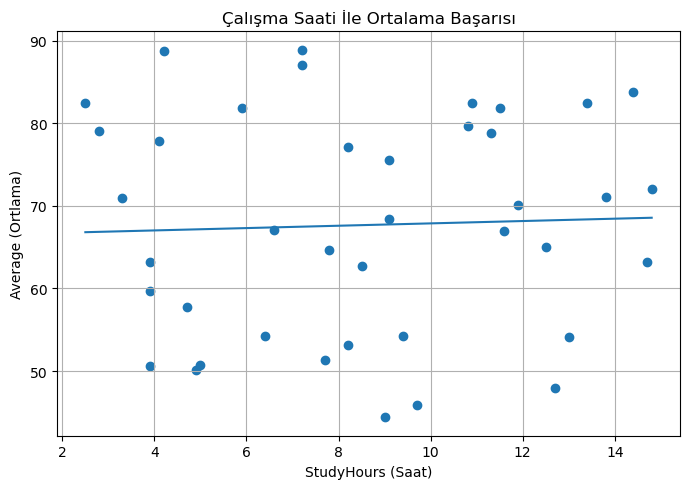

Çalışma saati ile Ortalama arası korelasyon: 0.04
Kolerasyon 0.3-0.6 arasındadır. 0 yakın ise başarısızdır.


In [129]:
plt.figure(figsize=(7,5))
plt.scatter(df_clean["StudyHours"],df_clean["Average"])
plt.xlabel("StudyHours (Saat)")
plt.ylabel("Average (Ortlama)")
plt.title("Çalışma Saati İle Ortalama Başarısı")
plt.grid(True)
#Doğrusal trend cizmmek. Çalışma saati ile ilgili.
m, b=np.polyfit(df_clean["StudyHours"],df_clean["Average"],1)
xvals=np.linspace(df_clean["StudyHours"].min(),df_clean["StudyHours"].max(),100)
plt.plot(xvals,m*xvals+b)
plt.tight_layout()
plt.show()
#Çalışma saati ve ortalama arasında kolerasyon (corr)
corr=df_clean["StudyHours"].corr(df_clean["Average"])
print(f"Çalışma saati ile Ortalama arası korelasyon: {corr:.2f}")    # Kolerasyon 0.3 ile 0.6 arasında 0 a yakınsa zayıftır.
print("Kolerasyon 0.3-0.6 arasındadır. 0 yakın ise başarısızdır.")

In [131]:
print("Genel ortalama:", df_clean["Average"].mean())
print("En yüksek ortalama ders:", subject_mean.idxmax(), subject_mean.max())
print("korelasyon:", df_clean["StudyHours"].corr(df_clean["Average"]))


Genel ortalama: 67.66749999999999
En yüksek ortalama ders: Matematik  78.8
korelasyon: 0.03947196347835162
